In [1]:
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [6]:
jsons = {}
complaint_glob = r"D:\ig_pipeline\cad\*\*\complaints.json"
for fn in glob.glob(complaint_glob):
    fn = pathlib.Path(fn)
    with open(fn, "r") as f:
        jsons["/".join(fn.parts[-3:-1])] = json.load(f)

In [8]:
print(jsons.keys())

dict_keys(['objects/batch-00', 'objects/batch-01', 'objects/batch-02', 'objects/batch-03', 'objects/batch-04', 'objects/batch-05', 'objects/batch-06', 'objects/batch-07', 'objects/batch-08', 'objects/batch-09', 'objects/batch-10', 'objects/batch-11', 'objects/batch-12', 'objects/batch-13', 'objects/legacy_batch-00', 'objects/legacy_batch-01', 'objects/legacy_batch-02', 'objects/legacy_batch-03', 'objects/legacy_batch-04', 'objects/legacy_batch-05', 'objects/legacy_batch-06', 'objects/legacy_batch-07', 'objects/legacy_batch-08', 'objects/legacy_batch-09', 'objects/legacy_batch-10', 'objects/legacy_batch-11', 'objects/legacy_batch-12', 'objects/procedural-aa', 'objects/substances-02', 'objects/task_relavant-ab', 'objects/task_relevant-xy', 'scenes/Beechwood_0_garden', 'scenes/Beechwood_0_int', 'scenes/Beechwood_1_int', 'scenes/Benevolence_0_int', 'scenes/Benevolence_1_int', 'scenes/Benevolence_2_int', 'scenes/commercial_kitchen_fire_extinguisher', 'scenes/commercial_kitchen_pans', 'scene

In [9]:
next(iter(jsons.values()))

[{'object': 'brown_rice-tnfazj',
  'message': 'Was at least one of the collision mesh candidates acceptable?',
  'complaint': 'Object includes floor plane',
  'processed': True},
 {'object': 'brown_rice-tnfazj',
  'message': 'Confirm object visual appearance.\nRequirements:\n- make sure there is only one rigid body.\n- make sure the object has a valid texture or appearance.\n- make sure the object has all parts necessary.',
  'complaint': 'base attached',
  'processed': True},
 {'object': 'batting_gloves-uteyjv',
  'message': "Confirm reasonable bounding box size:\n1.26m, 70.25cm, 56.99cm\nMake sure these sizes are within the same order of magnitude you expect from this object IRL.\nIf the scale is off, please let us know by a factor of how much (for example, 1000 if something\nthat's supposed to be 1mm is 1m instead) in your complaint note.",
  'complaint': 'x5',
  'processed': True},
 {'object': 'right_bookend-detqsw',
  'message': 'Confirm object visual appearance.\nRequirements:\n-

In [10]:
import collections
import re

type_re = re.compile(r"([A-Z]+):")

complaints_by_type = collections.defaultdict(list)
complained_objects = set()

for j in jsons.values():
    for complaint in j:
        if complaint["processed"]:
            continue
            
        complaint_type = "PREVIOUS PASS"
        m = type_re.match(complaint["message"])
        if m:
            complaint_type = m.group(1)
        complaints_by_type[complaint_type].append(complaint)
        complained_objects.add(complaint["object"])

In [11]:
print(complaints_by_type.keys())

dict_keys(['SYNSET', 'CATEGORY', 'APPEARANCE', 'ARTICULATION', 'ABILITIES', 'SUBSTANCE', 'PREVIOUS PASS', 'CONNECTED'])


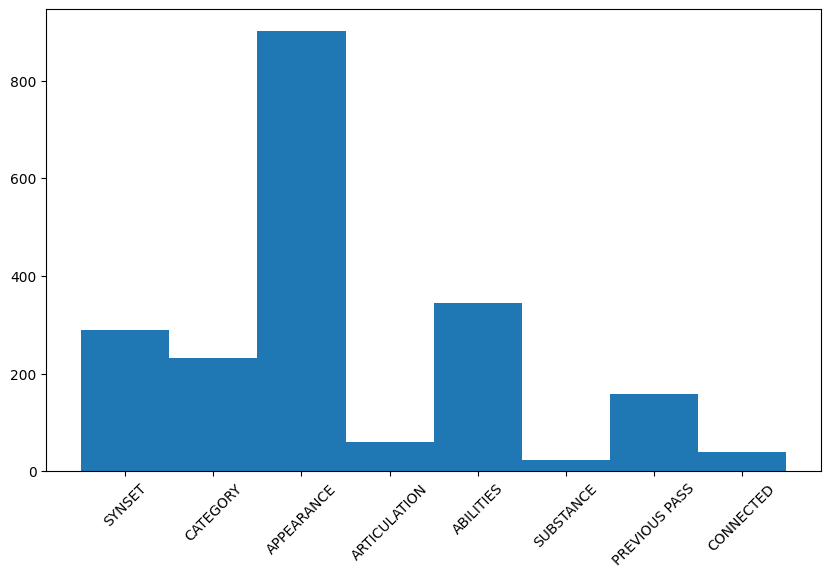

In [12]:
plt.rcParams["figure.figsize"] = (10,6)
labels, values = zip(*[(k, len(v)) for k, v in complaints_by_type.items()])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=45)
plt.show()